In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import permutations
from scipy import stats

In [2]:
df_sleep = pd.read_csv('C:/Users/Admin/Downloads/sleepDay_merged.csv')

In [3]:
df_sleep.head()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
0,1503960366,4/12/2016 0:00,1,327,346,NaN,NaN,NaN,NaN
1,1503960366,4/13/2016 0:00,2,384,407,NaN,Average of TotalSleepRecords,Min of TotalSleepRecords,Max of TotalSleepRecords
2,1503960366,4/15/2016 0:00,1,412,442,NaN,1.118644068,1,3
3,1503960366,4/16/2016 0:00,2,340,367,NaN,NaN,NaN,NaN
4,1503960366,4/17/2016 0:00,1,700,712,NaN,Average of TotalMinutesAsleep,Min of TotalMinutesAsleep,Max of TotalMinutesAsleep


In [4]:
df_sleep.tail()

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8
408,8792009665,4/30/2016 0:00,1,343,360,NaN,NaN,NaN,NaN
409,8792009665,5/1/2016 0:00,1,503,527,NaN,NaN,NaN,NaN
410,8792009665,5/2/2016 0:00,1,415,423,NaN,NaN,NaN,NaN
411,8792009665,5/3/2016 0:00,1,516,545,NaN,NaN,NaN,NaN
412,8792009665,5/4/2016 0:00,1,439,463,NaN,NaN,NaN,NaN


In [5]:
df_sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Id                  413 non-null    int64  
 1   SleepDay            413 non-null    object 
 2   TotalSleepRecords   413 non-null    int64  
 3   TotalMinutesAsleep  413 non-null    int64  
 4   TotalTimeInBed      413 non-null    int64  
 5   Unnamed: 5          0 non-null      float64
 6   Unnamed: 6          6 non-null      object 
 7   Unnamed: 7          6 non-null      object 
 8   Unnamed: 8          6 non-null      object 
dtypes: float64(1), int64(4), object(4)
memory usage: 29.2+ KB


In [6]:
df_sleep.isnull().sum()

Id                      0
SleepDay                0
TotalSleepRecords       0
TotalMinutesAsleep      0
TotalTimeInBed          0
Unnamed: 5            413
Unnamed: 6            407
Unnamed: 7            407
Unnamed: 8            407
dtype: int64

In [7]:
df_sleep.describe()

,Id,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Unnamed: 5
count,4.130000e+02,413.000000,413.000000,413.000000,0.0
mean,5.000979e+09,1.118644,419.467312,458.639225,NaN
std,2.060360e+09,0.345521,118.344679,127.101607,NaN
min,1.503960e+09,1.000000,58.000000,61.000000,NaN
25%,3.977334e+09,1.000000,361.000000,403.000000,NaN
50%,4.702922e+09,1.000000,433.000000,463.000000,NaN
75%,6.962181e+09,1.000000,490.000000,526.000000,NaN
max,8.792010e+09,3.000000,796.000000,961.000000,NaN


In [8]:
df_sleep.shape

(413, 9)

In [9]:
print(np.where(df_sleep['TotalTimeInBed']>10))

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 1

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='TotalTimeInBed'>

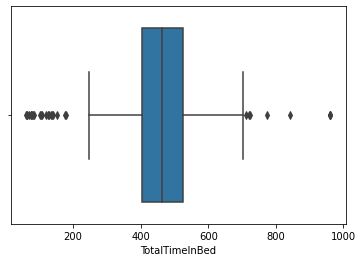

In [10]:
sns.boxplot(df_sleep['TotalTimeInBed'])

In [11]:
df_sleep.columns

Index(['Id', 'SleepDay', 'TotalSleepRecords', 'TotalMinutesAsleep',
       'TotalTimeInBed', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7',
       'Unnamed: 8'],
      dtype='object')

In [12]:
z = np.abs(stats.zscore(df_sleep['TotalTimeInBed']))
print(z)

0      0.887289
1      0.406776
2      0.131072
3      0.721866
4      1.995790
         ...   
408    0.777007
409    0.538496
410    0.280740
411    0.680287
412    0.034351
Name: TotalTimeInBed, Length: 413, dtype: float64


Text(0, 0.5, 'TotalTimeInBed')

C:\Python310\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


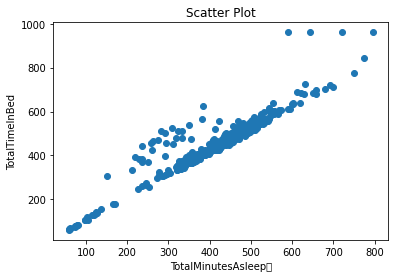

In [13]:
plt.scatter(df_sleep['TotalMinutesAsleep'], df_sleep['TotalTimeInBed'])
plt.title("Scatter Plot")
plt.xlabel('TotalMinutesAsleep	')
plt.ylabel('TotalTimeInBed')

In [14]:
df_new = df_sleep.dropna(subset=['TotalSleepRecords'])

In [15]:
def get_sec(time_str):
    """Get Seconds from time."""
    h, m = time_str.split(':')
    return int(h) * 3600 + int(m) * 60

C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Python310\lib\site-packages\seaborn\_decorators.py:36: FutureWar

ValueError: min() arg is an empty sequence

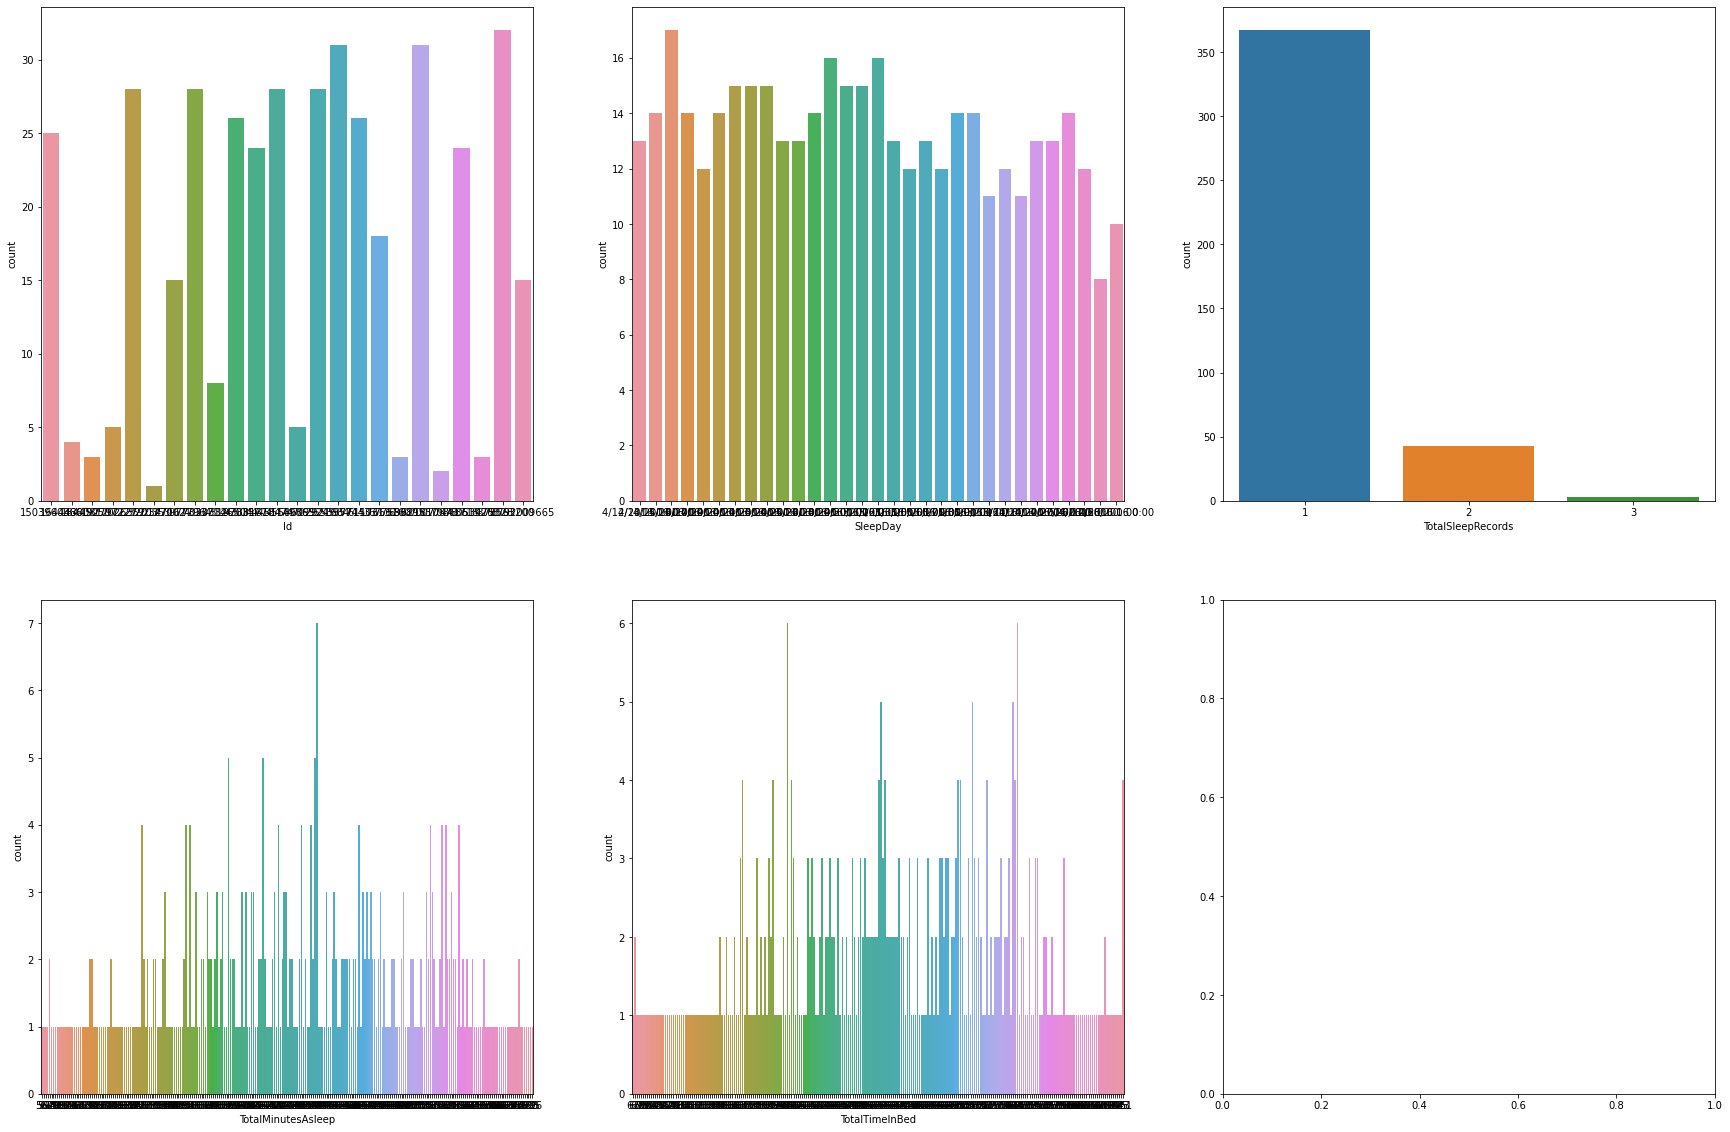

In [16]:
# showing a count plot of each column
plt.figure(figsize=(30,20))
for i, c in enumerate(df_sleep.columns):
    plt.subplot(2,3,i+1)
    sns.countplot(df_sleep[c])
plt.show()

In [ ]:
column_permutations = permutations(df_sleep.columns,2)
plt.figure(figsize=(30,30))
for i, c in enumerate(column_permutations):
    plt.subplot(6,5,i+1)
    plt.title(i+1)
    sns.countplot(df_sleep[c[0]], hue=df_sleep[c[1]])
plt.show()

In [ ]:
# swarm plot with two columns
sns.catplot(x="TotalMinutesAsleep", y="TotalTimeInBed",
            hue="SleepDay", col="TotalSleepRecords",
            data=df_sleep, kind="swarm")
plt.show()

In [ ]:
Q1 = np.percentile(df_sleep['TotalSleepRecords'], 25,
                   interpolation = 'midpoint')
 
Q3 = np.percentile(df_sleep['TotalSleepRecords'], 75,
                   interpolation = 'midpoint')
IQR = Q3 - Q1

In [ ]:
upper = df_sleep['TotalSleepRecords'] >= (Q3+1.5*IQR) 
print("Upper bound:",upper)
print(np.where(upper))


In [ ]:
lower = df_sleep['TotalSleepRecords'] <= (Q1-1.5*IQR)
print("Lower bound:", lower)
print(np.where(lower))